# <a id='toc1_'></a>[Solow-Swan model with Limited Ressources](#toc0_)

This project aims to solve the Solow-Swan model with limited ressources. The model is a neoclassical growth model, which is used to describe the long-run economic growth in terms of productivity, capital accumulation, population growth and technological progress. The model is based on the assumption that the economy is closed, meaning that there is no trade with other countries. The model is also based on the assumption that the economy is in a steady state, meaning that the capital stock per worker is constant. 

This project includes the solow model with the implementation of Land and Oil. 

**Table of contents**<a id='toc0_'></a>    
- [Solow-Swan model with Limited Ressources](#toc1_)    
- [Introduction](#toc2_)    
  - [Baseline Solow Model](#toc2_1_)    
  - [Analytical Steady State of the Model](#toc2_2_)    
  - [Numerical Solution of the Model](#toc2_3_)    
    - [Methods: Bisect and Brent](#toc2_3_1_)    
    - [Results](#toc2_3_2_)    
  - [Further analysis](#toc2_4_)    
    - [Simulation of the model](#toc2_4_1_)    
    - [Extended simulation of the model](#toc2_4_2_)    
  - [Conclusion](#toc2_5_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
import sympy as sm
from scipy import optimize
import matplotlib.pyplot as plt
import ipywidgets as widgets

plt.rcParams['figure.figsize'] = [16, 8]

%load_ext autoreload
%autoreload 2

from modelproject import SolowModelClass
from modelproject import analytic_ss

----
# <a id='toc2_'></a>[Introduction](#toc0_)

## <a id='toc2_1_'></a>[Baseline Solow Model](#toc0_)

1. $K_t$ is capital
2. $L_t$ is labor (growing with a constant rate of $n$)
3. $A_t$ is technology (growing with a constant rate of $g$)
4. $Y_t = F(K_t,A_t,L_t)$ is GDP

The **production function** is assumed of form **Cobb-Douglas** i.e.

$$
Y_t = F(K_{t},A_{t},L_{t})=K_{t}^{\alpha}(A_{t}L_{t})^{1-\alpha}, \alpha \leq 1
$$


**Saving** is a constant fraction of GDP

$$ 
S_t = s_YY_t,\,s_Y\in(0,1)
$$

such that **capital accumulates** according to

$$
K_{t+1}=S_{t}+(1-\delta)K_{t}, \delta \in (0,1)
$$

The **population** grows with n each year 

$$
L_{t+1} = (1+n)L_t, n > -1 
$$

The **technology** growth follows an exogenous path of 

$$
A_{t+1} = (1+g)A_t
$$ 

#Extension 
We will extend the **Solow-model** with an exhuastible ressource $R_t$

5. $R_t$ is the stock of the limited ressource which is used up over time
6. $E_t$ is the amount of the ressource used in period $t$

The updated production function now is **production function**

$$
Y_t = F(K_{t},E_{t},A_{t},L_{t})=K_{t}^{\alpha}(A_{t}L_{t})^{1-\varepsilon-\alpha}E_t^{\varepsilon}, \alpha + \varepsilon \leq 1
$$

The **limited ressource** has a reserve $R_0$ and in each period $E_t$ of this reserve is used. Thus $E_t$ and $R_t$ follows

$$
E_t = s_E R_t, s_E \in (0,1)
$$

$$
R_{t} = R_{t-1} - E_{t-1} = (1-s_E)R_{t-1} = (1-s_E)^t R_0
$$

**Saving**, **capital accumulation**, **population growth** and **technology growth** is similar to the baseline Solow Model. Further it is seen how when $\varepsilon = 0$ the model returns to the baseline model.

## <a id='toc2_2_'></a>[Analytical Steady State of the Model](#toc0_)

We will evaluate the steady state in the capital output ratio, $z_t \equiv \frac{K_t}{Y_t}$.
$$
z_{t+1} = \frac{K_{t+1}}{Y_{t+1}} = \frac{K_{t+1}^{1-\alpha}}{(A_{t+1}L_{t+1})^{1-\varepsilon-\alpha}E_{t+1}^\varepsilon}
$$

Inserting savings into the capital accumulation equation and rewriting yields
$$
z_{t+1} = \frac{(s_{Y} Y_{t} +(1-\delta)K_{t})^{1-\alpha}}{(A_{t+1}L_{t+1})^{1-\varepsilon-\alpha}E_{t+1}^\varepsilon} = \frac{(s_{Y} +(1-\delta)z_t)^{1-\alpha}}{((1+g)(1+n))^{1-\varepsilon-\alpha}(1-s_E)^{\varepsilon}} \frac{Y_t^{1-\alpha}}{(A_{t}L_{t})^{1-\varepsilon-\alpha}E_{t}^\varepsilon} = \frac{(s_{Y} +(1-\delta)z_t)^{1-\alpha}}{((1+g)(1+n))^{1-\varepsilon-\alpha}(1-s_E)^{\varepsilon}}z_t^\alpha
$$

We use **sympy** to find an analytical expression for the steady state, i.e. solve

$$
z^* = \frac{(s_{Y} +(1-\delta)z^*)^{1-\alpha}}{((1+g)(1+n))^{1-\varepsilon-\alpha}(1-s_E)^{\varepsilon}}(z^*)^\alpha
$$

However, **sympy** for some reason has some problems solving this, thus, we start by helping it a bit on the right track
$$
(z^*)^{1-\alpha} = \frac{(s_{Y} +(1-\delta)z^*)^{1-\alpha}}{((1+g)(1+n))^{1-\varepsilon-\alpha}(1-s_E)^{\varepsilon}} \Leftrightarrow
$$

$$
z^* = \frac{1}{\left(((1+g)(1+n))^{1-\varepsilon-\alpha}(1-s_E)^{\varepsilon}\right)^{\frac{1}{1-\alpha}}} (s_{Y} +(1-\delta)z^*)
$$

Now **sympy** can solve the equation and provide an analytical solution

In [2]:
# a. analytically solve for steady state
analytical = analytic_ss(ext = False, do_print = True)
analytical_ext = analytic_ss(ext = True, do_print = True)


The analytical steady state of the baseline model is:


Eq(z, s_Y/(delta - 1 + ((g*n + g + n + 1)**(1 - alpha))**(-1/(alpha - 1))))

The analytical steady state of the extended model is:


Eq(z, s_Y/(delta - 1 + ((1 - s_E)**epsilon*(g*n + g + n + 1)**(-alpha - epsilon + 1))**(-1/(alpha - 1))))

## <a id='toc2_3_'></a>[Numerical Solution of the Model](#toc0_)

We will nummerically solve this model using 2 different methods – **Bisect**, and **Brent** – and evaluate their precession when comparing to the analytical solution evaluated in the same parameter values.

To solve the model we evaluate when it holds that
$$
0 = z_{t+1}-z_t = \frac{(s_{Y} +(1-\delta)z_t)^{1-\alpha}}{((1+g)(1+n))^{1-\varepsilon-\alpha}(1-s_E)^{\varepsilon}}z_t^\alpha - z_t
$$

All the numerical optimizers are defined in the [modelproject.py](modelproject.py) thus, here we just call them

In [3]:
# a. loading the baseline model
model = SolowModelClass()
model.setup()

# b. solve for nummerical steady state
zstar_bisect = model.solve_ss(method='bisect', ext=True, do_print=True)
zstar_brent = model.solve_ss(method='brentq', ext=True, do_print=True)

# c. evaluate analytical steady state
zstar_analytic = model.evaluate_ss(analytical_ext, ext=True,do_print=True)


      converged: True
           flag: 'converged'
 function_calls: 48
     iterations: 46
           root: 1.4028207764242397
      converged: True
           flag: 'converged'
 function_calls: 8
     iterations: 7
           root: 1.4028207764243779
z = 1.40282077642438


### <a id='toc2_3_1_'></a>[Methods: Bisect and Brent](#toc0_)
The code first obtains the analytical solution for the steady state of the model. The steady state is a point where the capital stock no longer changes. This is calculated through the function analytic_ss, which uses the standard formula for the steady state in the Solow model. This is done both with and without some external factors (ext), and the results are printed. analytic_ss is derived from the seperate Python file modelproject.py.


The code then numerically solves the same model using two different methods: bisect and brent. 
These are different numerical methods used to find the root of a function, i.e., the value for which the function equals zero. In this case, the function is the difference between the capital stock at time t+1 and time t, which is equal to zero at the steady state.

- The bisect method works by repeatedly dividing an interval into two subintervals and then selecting the subinterval where the root lies based on the sign of the function at the midpoint. 

- The brent method, also known as Brent's method, combines the bisection method, the secant method, and inverse quadratic interpolation. It generally provides better performance than the bisection method.


Lastly the code evaluates the steady state obtained from the analytical solution using the function model.evaluate_ss. This compares the results obtained from the numerical methods to the analytical solution.


### <a id='toc2_3_2_'></a>[Results](#toc0_)

1. The bisect method took 46 iterations and 48 function calls to find a steady state of approximately 1.4028207764242397. This method typically requires more iterations compared to other methods because it uses a relatively simple and robust approach, which is dividing the interval into two subintervals and then selecting the subinterval where the root lies.

2. The brentq method is more efficient, taking only 6 iterations and 7 function calls to find a steady state of approximately 1.4028207764243779. Brent's method combines the bisection method, the secant method, and inverse quadratic interpolation to achieve faster convergence.

3. The analytical solution is approximately 1.40282077642438, which is very close to the solutions found by the numerical methods. This suggests that the numerical methods were implemented correctly and were able to accurately find the steady state of the Solow growth model.


**Conclusion**

We find the methods to provide robust and viable results for estimating the Solow Model. 

Additionally the convergence plot is shown below.

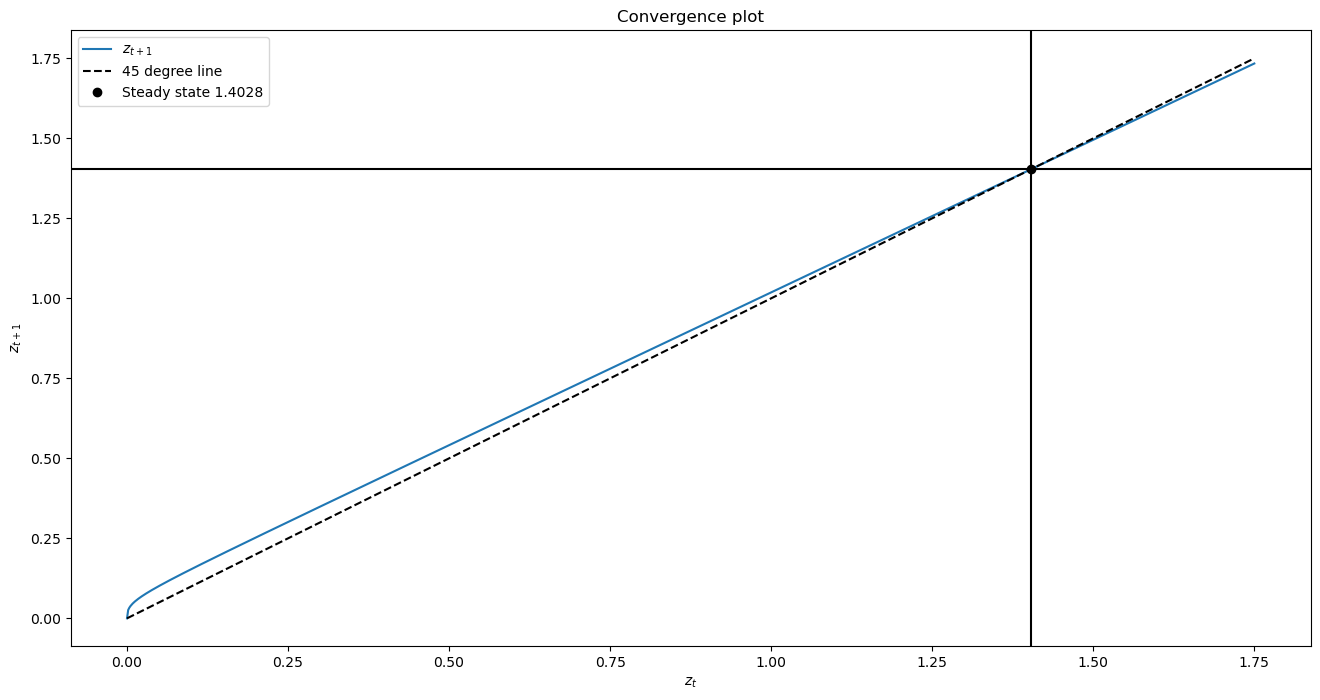

In [10]:
model.convergence_plot(ext=True)

## <a id='toc2_4_'></a>[Further analysis](#toc0_)

### <a id='toc2_4_1_'></a>[Simulation of the model](#toc0_)

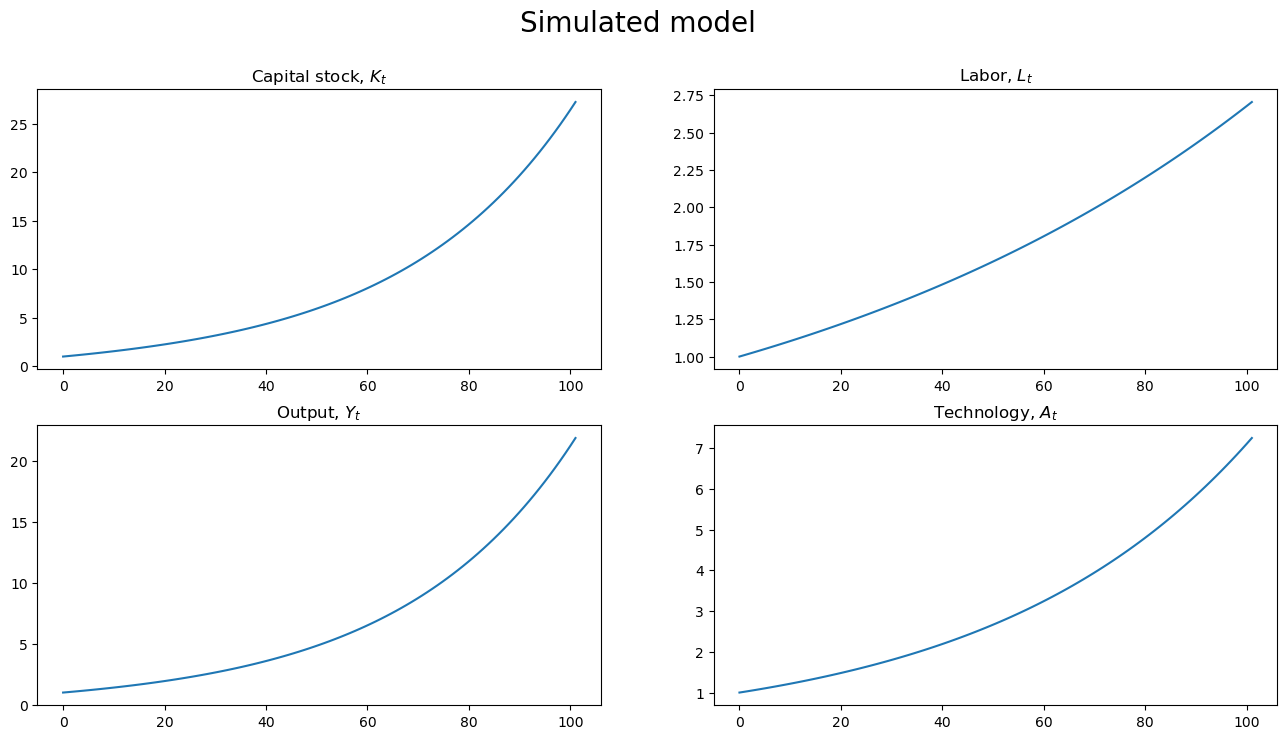

In [5]:
model.simulate(periods = 100, ext=False, do_print=True)

### <a id='toc2_4_2_'></a>[Extended simulation of the model](#toc0_)

The plot below shows the simulated model with limited resources. The plot shows the Capital stock $K_t$, Labor $L_t$, Limited ressource $R_t$, Output $Y_t$, Technology $A_t$, and the Consumption of limited ressource $E_t$.

**Interpretation**



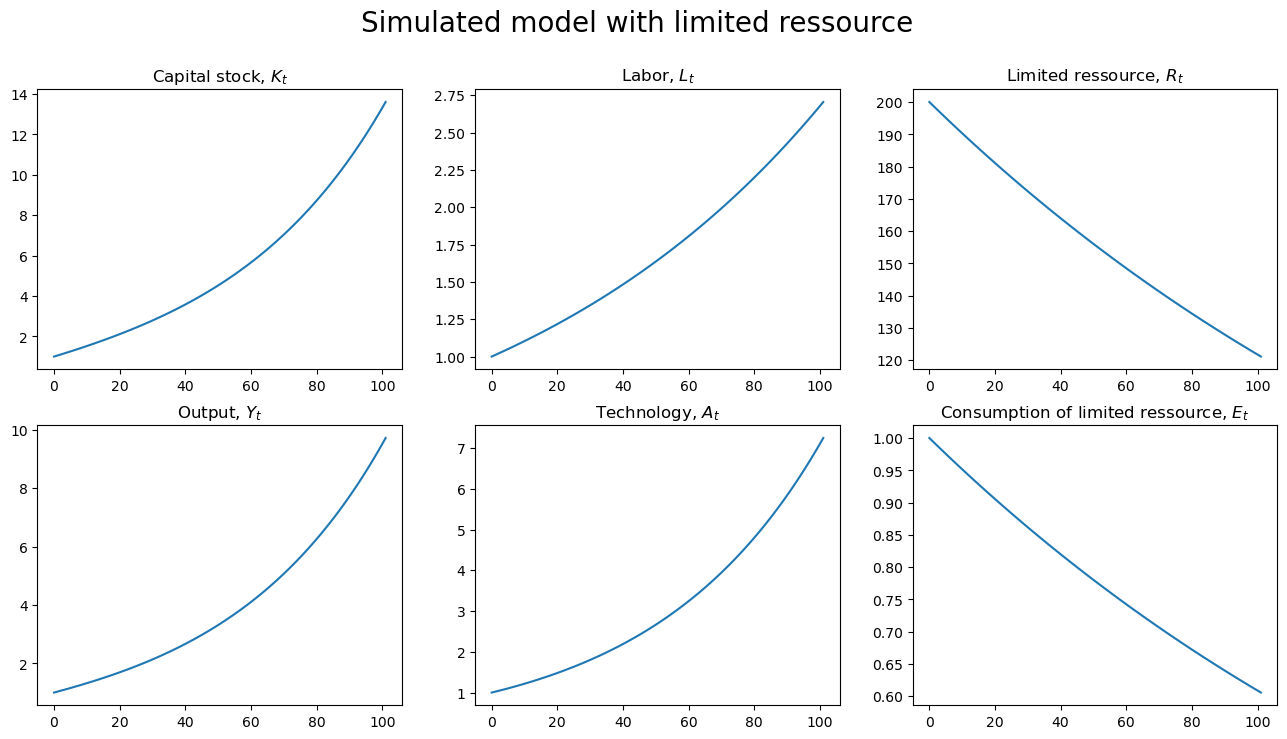

In [6]:
model.simulate(periods = 100, ext=True, do_print=True)

## <a id='toc2_5_'></a>[Conclusion](#toc0_)